Frederico Furst Bittencourt

2022/06/05

Copied and modified from https://scipy-cookbook.readthedocs.io/items/CoupledSpringMassSystem.html (em 2002/jun/07).

Tentative titles:

- The prediction of Strength, Damage Initiation and Damage Progression in the Open Hole, Filled Hole and Single-Shear Bearing tests for Composite Material Laminates and Chaos and Hyperchaos in the Triple Mass-Spring System Dynamic Response

- Chaos and Hyperchaos in the Triple Mass-Spring Dynamic Response and its application to the prediction of Strength, Damage Initiation and Damage Progression in the Open Hole, Filled Hole and Single-Shear Bearing tests for Composite Material Laminates

# Four Mass-Spring Model

## Imports and Libraries

In [ ]:
!pip install nolds
import nolds
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Plot the solution that was generated
import matplotlib.pyplot as plt

In [ ]:
# Use ODEINT to solve the differential equations defined by the vector field
from scipy.integrate import odeint

### Model Specification

In [ ]:
forca_inicial = 0.0
forca_final = -1.0
tempo_inicial = 5.0
tempo_final = 10.0

In [ ]:
# Parameter values
# Masses:
m1 = 2.0
m2 = 2.0
m3 = 2.0
m4 = 2.0
m5 = 2.0
# Spring constants
k1 = 5.0
k2 = 5.0
k3 = 5.0
k4 = 5.0
k5 = 5.0
# Natural lengths
L1 = 1.0
L2 = 1.0
L3 = 1.0
L4 = 1.0
L5 = 1.0
# Friction coefficients
b1 = 0.6
b2 = 0.6
b3 = 0.6
b4 = 0.6
b5 = 0.6

# Initial conditions
# x1 and x2 are the initial displacements; y1 and y2 are the initial velocities
x1 = 1.0
y1 = 0.0
x2 = 2.0
y2 = 0.0
x3 = 3.0
y3 = 0.0
x4 = 4.0
y4 = 0.0
x5 = 5.0
y5 = 0.0

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 25.0
numpoints = 1000

# Create the time samples for the output of the ODE solver.
# I use a large number of points, only because I want to make
# a plot of the solution that looks nice.
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

In [ ]:
def F1(t):
    return 0.0
def F2(t):
    return 0.0

## Entrada de Degrau de Força em $x_3$

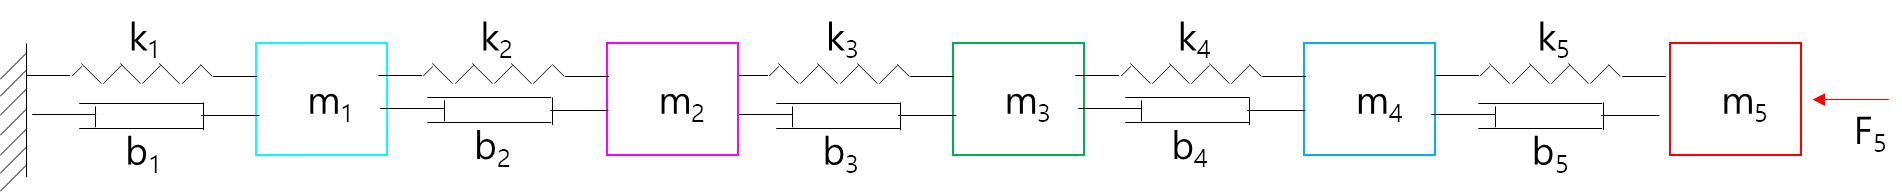

### Entradas

#### Degrau de Força de Entrada

In [ ]:
# degrau de forca
def degrau_forca(t):
    if t <= 5.0:
        forca = forca_inicial
    else:
        forca = forca_final
    return forca

#### Campo Vetorial

In [ ]:
def degrau_forca_vectorfield(w, t, p):
    """
    Defines the differential equations for the coupled spring-mass system.

    Arguments:
        w :  vector of the state variables:
                  w = [x1,y1,x2,y2,x3,y3]
        t :  time
        p :  vector of the parameters:
                  p = [m1,m2,m3,k1,k2,k3,L1,L2,L3,b1,b2,b3]
    """
    x1, y1, x2, y2, x3, y3, x4, y4, x5, y5 = w
    m1, m2, m3, m4, m5, k1, k2, k3, k4, k5, L1, L2, L3, L4, L5, b1, b2, b3, b4, b5 = p

    # Create f = (x1',y1',x2',y2' ...):
    f = [
            y1,
            (-b1 * y1 - k1 * (x1 - L1) + k2 * (x2 - x1 - L2) + F1(t)) / m1,
            y2,
            (-b2 * y2 - k2 * (x2 - x1 - L2) + k3 * (x3 - x2 - L3) ) / m2,
            y3,
            (-b3 * y3 - k3 * (x3 - x2 - L3) + k4 * (x4 - x3 - L4) ) / m3,
            y4,
            (-b4 * y4 - k4 * (x4 - x3 - L4) + k5 * (x5 - x4 - L5) ) / m4,
            y5,
            (-b5 * y5 - k5 * (x5 - x4 - L5) + degrau_forca(t)) / m5,
        ]
    return f

### Saídas

#### Unpacking

In [ ]:
# Pack up the parameters and initial conditions:
p = [m1, m2, m3, m4, m5, k1, k2, k3, k4, k5, L1, L2, L3, L4, L5, b1, b2, b3, b4, b5]
w0 = [x1, y1, x2, y2, x3, y3, x4, y4, x5, y5]

# Call the ODE solver.
wsol = odeint(degrau_forca_vectorfield, w0, t, args=(p,),
              atol=abserr, rtol=relerr)

at, ax1, ay1, ax2, ay2, ax3, ay3, ax4, ay4, ax5, ay5 = [],[],[],[],[],[],[],[],[],[],[]
# adendo
IE1, KE1 = [],[]
IE2, KE2 = [],[]
IE3, KE3 = [],[]
IE4, KE4 = [],[]
IE5, KE5 = [],[]
ET = []
for t1, w1 in zip(t, wsol):
    # print( t1, w1[0], w1[1], w1[2], w1[3])
    at.append(t1)
    ax1.append(w1[0])
    ay1.append(w1[1])
    ax2.append(w1[2])
    ay2.append(w1[3])
    ax3.append(w1[4])
    ay3.append(w1[5])
    ax4.append(w1[6])
    ay4.append(w1[7])
    ax5.append(w1[8])
    ay5.append(w1[9])

    IE1.append(k1*(w1[0]-L1)**2/2)
    KE1.append(m1*w1[1]**2/2)
    IE2.append(k2*(w1[2]-w1[0]-L2)**2/2)
    KE2.append(m2*w1[3]**2/2)
    IE3.append(k3*(w1[4]-w1[2]-L3)**2/2)
    KE3.append(m3*w1[5]**2/2)
    IE4.append(k4*(w1[6]-w1[4]-L4)**2/2)
    KE4.append(m4*w1[7]**2/2)
    IE5.append(k5*(w1[8]-w1[6]-L5)**2/2)
    KE5.append(m5*w1[9]**2/2)
    ET.append(k1*(w1[0]-L1)**2/2+
              m1*w1[1]**2/2+
              k2*(w1[2]-w1[0]-L2)**2/2+
              m2*w1[3]**2/2+
              k3*(w1[4]-w1[2]-L3)**2/2+
              m3*w1[5]**2/2+
              k4*(w1[6]-w1[4]-L3)**2/2+
              m4*w1[7]**2/2+
              k5*(w1[8]-w1[6]-L3)**2/2+
              m5*w1[9]**2/2)

#### Forças Aplicada e de Reação

Text(0.5, 1.0, 'Reaction and Applied Forces for the Five Coupled Spring-Mass System degrau forca')

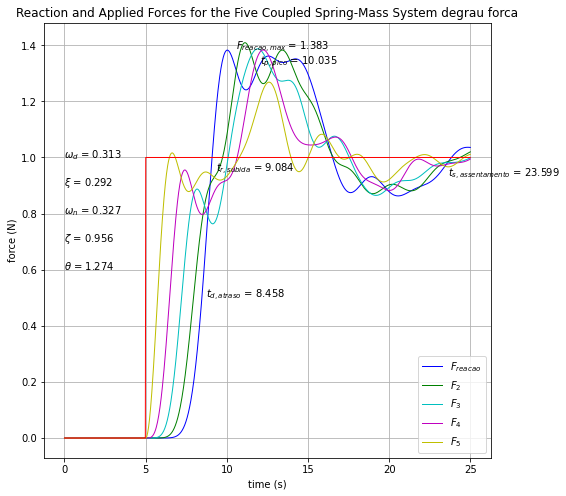

In [ ]:
plt.figure(figsize=(8,8))
Freacao = -k1*np.array(ax1) + np.array([k1*L1 for i in range(len(ax1))])
plt.plot(at, Freacao, 'b', linewidth=1)
F2 = -k2*(np.array(ax2)-np.array(ax1)-L2)
plt.plot(at, F2, 'g', linewidth=1)
F3 = -k3*(np.array(ax3)-np.array(ax2)-L3)
plt.plot(at, F3, 'c', linewidth=1)
F4 = -k4*(np.array(ax4)-np.array(ax3)-L4)
plt.plot(at, F4, 'm', linewidth=1)
F5 = -k4*(np.array(ax5)-np.array(ax4)-L4)
plt.plot(at, F5, 'y', linewidth=1)
plt.plot(at, -np.array([ degrau_forca(t) for t in at ]), 'r', linewidth=1)

plt.text(
    at[np.where(Freacao == max(Freacao))[0][0]]+0.5,
    max(Freacao),
    '$F_{reacao,max}$ = '+str("{:.3f}".format(max(Freacao)))
    )
array_diferencas = Freacao - (-forca_final)
indice_tr = np.abs(array_diferencas)[:np.where(Freacao == max(Freacao))[0][0]].argmin()
plt.text(
    at[indice_tr]+0.25,
    -forca_final-0.05,
    '$t_{r,subida}$ = '+str("{:.3f}".format(at[indice_tr]))
    )
array_diferencas = Freacao - (-forca_final/2)
indice_td = np.abs(array_diferencas)[:np.where(Freacao == max(Freacao))[0][0]].argmin()
plt.text(
    at[indice_td]+0.25,
    - forca_final/2,
    '$t_{d,atraso}$ = '+str("{:.3f}".format(at[indice_td]))
    )
indice_tp = np.where(Freacao == max(Freacao))[0][0]
plt.text(
    at[indice_tp]+2,
    Freacao[indice_tp]-0.05,
    '$t_{p,pico}$ = '+str("{:.3f}".format(at[indice_tp]))
    )
tolerancia = 0.02
array_diferencas_abs = np.abs( Freacao - (-forca_final) )
indices_tol = np.where(array_diferencas_abs < tolerancia)[0]
comecos_de_pedacos = []
for i in range(len(indices_tol)-1):
  if indices_tol[i] != indices_tol[i+1]-1:
    comecos_de_pedacos.append(i)
indice_ts = indices_tol[comecos_de_pedacos[-1]+1]
plt.text(
    at[indice_ts],
    Freacao[indice_ts]-0.05,
    '$t_{s,assentamento}$ = '+str("{:.3f}".format(at[indice_ts]))
    )
omega_d = np.pi/at[indice_tp]
plt.text(
    0.0, 1.0,
    '$\omega_d$ = '+str("{:.3f}".format(omega_d))
)
UP = max(Freacao) - (-forca_final)
xi = -np.log(UP)/np.sqrt(np.pi**2+np.log(UP)**2)
plt.text(
    0.0, 0.9,
    r'$\xi$ = '+str("{:.3f}".format(xi))
)
omega_n = omega_d/np.sqrt(1-xi*xi)
plt.text(
    0.0, 0.8,
    '$\omega_n$ = '+str("{:.3f}".format(omega_n))
)
zeta = np.sqrt(1-xi**2)
plt.text(
    0.0, 0.7,
    '$\zeta$ = '+str("{:.3f}".format(zeta))
)
theta = np.arctan(np.sqrt(1-xi**2)/xi)
plt.text(
    0.0, 0.6,
    r'$\theta$ = '+str("{:.3f}".format(theta))
)
plt.grid(visible=True)
plt.xlabel('time (s)')
plt.ylabel('force (N)')
plt.legend((r'$F_{reacao}$', r'$F_{2}$', r'$F_{3}$', r'$F_{4}$', r'$F_{5}$'),loc='lower right')
plt.title('Reaction and Applied Forces for the Five Coupled Spring-Mass System degrau forca')

#### Posições

Text(0.5, 1.0, 'Mass Displacements for the Five Coupled Spring-Mass System degrau forca')

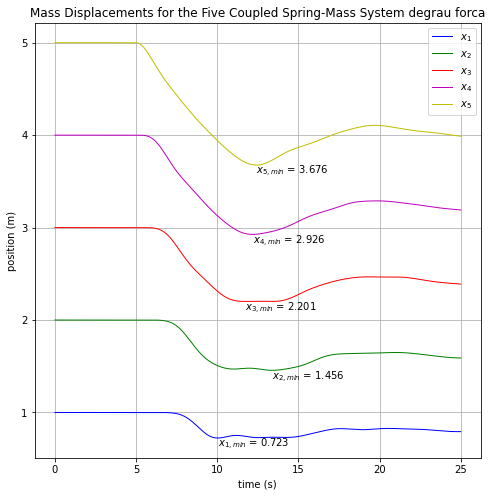

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(at, ax1, 'b', linewidth=1)
plt.plot(at, ax2, 'g', linewidth=1)
plt.plot(at, ax3, 'r', linewidth=1)
plt.plot(at, ax4, 'm', linewidth=1)
plt.plot(at, ax5, 'y', linewidth=1)

plt.text(at[ax1.index(min(ax1))], min(ax1)-0.1, '$x_{1,min}$ = '+str("{:.3f}".format(min(ax1))))
plt.text(at[ax2.index(min(ax2))], min(ax2)-0.1, '$x_{2,min}$ = '+str("{:.3f}".format(min(ax2))))
plt.text(at[ax3.index(min(ax3))], min(ax3)-0.1, '$x_{3,min}$ = '+str("{:.3f}".format(min(ax3))))
plt.text(at[ax4.index(min(ax4))], min(ax4)-0.1, '$x_{4,min}$ = '+str("{:.3f}".format(min(ax4))))
plt.text(at[ax5.index(min(ax5))], min(ax5)-0.1, '$x_{5,min}$ = '+str("{:.3f}".format(min(ax5))))
plt.grid(visible=True)
plt.xlabel('time (s)')
plt.ylabel('position (m)')
plt.legend((r'$x_1$', r'$x_2$', r'$x_3$', r'$x_4$', r'$x_5$'))
plt.title('Mass Displacements for the Five Coupled Spring-Mass System degrau forca')

#### Velocidades

Text(0.5, 1.0, 'Mass Velocities for the Five Coupled Spring-Mass System degrau forca')

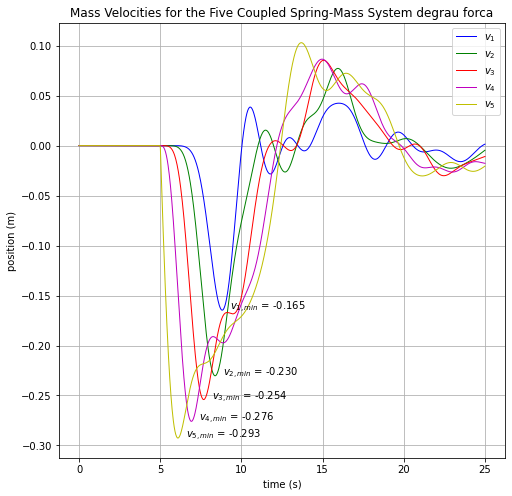

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(at, ay1, 'b', linewidth=1)
plt.plot(at, ay2, 'g', linewidth=1)
plt.plot(at, ay3, 'r', linewidth=1)
plt.plot(at, ay4, 'm', linewidth=1)
plt.plot(at, ay5, 'y', linewidth=1)


plt.text(at[ay1.index(min(ay1))]+0.5, min(ay1), '$v_{1,min}$ = '+str("{:.3f}".format(min(ay1))))
plt.text(at[ay2.index(min(ay2))]+0.5, min(ay2), '$v_{2,min}$ = '+str("{:.3f}".format(min(ay2))))
plt.text(at[ay3.index(min(ay3))]+0.5, min(ay3), '$v_{3,min}$ = '+str("{:.3f}".format(min(ay3))))
plt.text(at[ay4.index(min(ay4))]+0.5, min(ay4), '$v_{4,min}$ = '+str("{:.3f}".format(min(ay4))))
plt.text(at[ay5.index(min(ay5))]+0.5, min(ay5), '$v_{5,min}$ = '+str("{:.3f}".format(min(ay5))))

plt.grid(visible=True)
plt.xlabel('time (s)')
plt.ylabel('position (m)')
plt.legend((r'$v_1$', r'$v_2$', r'$v_3$', r'$v_4$', r'$v_5$'))
plt.title('Mass Velocities for the Five Coupled Spring-Mass System degrau forca')

Text(0.5, 1.0, 'Energies')

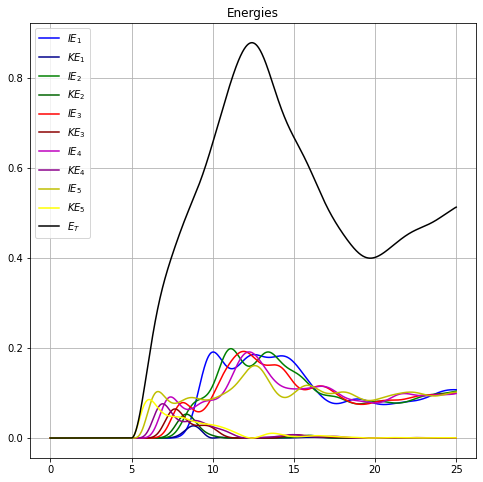

In [ ]:

# adendo
plt.figure(figsize=(8,8))
plt.grid(visible=True)
plt.plot(at,IE1,'b-')
plt.plot(at,KE1,'darkblue')
plt.plot(at,IE2,'g-')
plt.plot(at,KE2,'darkgreen')
plt.plot(at,IE3,'r-')
plt.plot(at,KE3,'darkred')
plt.plot(at,IE4,'m-')
plt.plot(at,KE4,'darkmagenta')
plt.plot(at,IE5,'y-')
plt.plot(at,KE5,'yellow')
plt.plot(at,ET,'black')
plt.legend((r'$IE_1$',r'$KE_1$',r'$IE_2$',r'$KE_2$',r'$IE_3$',r'$KE_3$',r'$IE_4$',r'$KE_4$',r'$IE_5$',r'$KE_5$',r'$E_T$'))
plt.title('Energies')

#### Extremos

In [ ]:
print('x1_min = '+str(min(ax1)))
print('x2_min = '+str(min(ax2)))
print('x3_min = '+str(min(ax3)))

print('Freacao_max = '+str(max(-k1*np.array(ax1) + np.array([k1*L1 for i in range(len(ax1))]))))
print('Fx2_min = '+str(min(np.array([ degrau_forca(t) for t in at ]))))

x1_min = 0.7234695784238858
x2_min = 1.455675388733115
x3_min = 2.2011021920152345
Freacao_max = 1.382652107880571
Fx2_min = -1.0


In [ ]:
print(np.array([
    # nolds.lyap_r(a)#x1),
    nolds.lyap_e(ax1),#,emb_dim=28,matrix_dim=10),
    # nolds.dfa(ax1))#,
    # nolds.lyap_r(a)#x2),
    nolds.lyap_e(ax2),#,emb_dim=28,matrix_dim=10),
    # nolds.dfa(ax2))#,
    nolds.lyap_e(ax3),#,emb_dim=28,matrix_dim=10),
    
    nolds.lyap_e(ax4),#,emb_dim=28,matrix_dim=10),
    
    nolds.lyap_e(ax5),#,emb_dim=28,matrix_dim=10),
]))

[[ 0.03255986  0.01736179  0.00681996 -0.15382394]
 [ 0.02538058  0.01663111 -0.00081575 -0.16284269]
 [ 0.01911349  0.00278447 -0.01711749 -0.2119232 ]
 [ 0.01233787 -0.00771542 -0.01080413 -0.26006684]
 [ 0.00233853 -0.01768187 -0.02872152 -0.28815228]]



## Entrada de Rampa em Força em $x_3$

### Entradas

#### Rampa de Força de Entrada

In [ ]:
# rampa de forca
def rampa_forca(t):
    if t < 5.0:
        forc = forca_inicial
    elif t >= 5.0 and t <= 10.0:
        # forc = 5.0-1.0*t
        forc = forca_inicial+(forca_final-forca_inicial)/(10.0-5.0)*(t-5.0)
    else:
        forc = forca_final
    return forc

#### Campo Vetorial

In [ ]:
def rampa_forca_vectorfield(w, t, p):
    """
    Defines the differential equations for the coupled spring-mass system.

    Arguments:
        w :  vector of the state variables:
                  w = [x1,y1,x2,y2,x3,y3]
        t :  time
        p :  vector of the parameters:
                  p = [m1,m2,m3,k1,k2,k3,L1,L2,L3,b1,b2,b3]
    """
    x1, y1, x2, y2, x3, y3, x4, y4, x5, y5 = w
    m1, m2, m3, m4, m5, k1, k2, k3, k4, k5, L1, L2, L3, L4, L5, b1, b2, b3, b4, b5 = p

    # Create f = (x1',y1',x2',y2' ...):
    f = [
            y1,
            (-b1 * y1 - k1 * (x1 - L1) + k2 * (x2 - x1 - L2) + F1(t)) / m1,
            y2,
            (-b2 * y2 - k2 * (x2 - x1 - L2) + k3 * (x3 - x2 - L3) ) / m2,
            y3,
            (-b3 * y3 - k3 * (x3 - x2 - L3) + k4 * (x4 - x3 - L4) ) / m3,
            y4,
            (-b4 * y4 - k4 * (x4 - x3 - L4) + k5 * (x5 - x4 - L5) ) / m4,
            y5,
            (-b5 * y5 - k5 * (x5 - x4 - L5) + rampa_forca(t)) / m5,
        ]
    return f

### Saídas

#### Unpacking

In [ ]:
# Pack up the parameters and initial conditions:
p = [m1, m2, m3, m4, m5, k1, k2, k3, k4, k5, L1, L2, L3, L4, L5, b1, b2, b3, b4, b5]
w0 = [x1, y1, x2, y2, x3, y3, x4, y4, x5, y5]

# Call the ODE solver.
wsol = odeint(rampa_forca_vectorfield, w0, t, args=(p,),
              atol=abserr, rtol=relerr)

at, ax1, ay1, ax2, ay2, ax3, ay3, ax4, ay4, ax5, ay5 = [],[],[],[],[],[],[],[],[],[],[]

# adendo
IE1, KE1 = [],[]
IE2, KE2 = [],[]
IE3, KE3 = [],[]
IE4, KE4 = [],[]
IE5, KE5 = [],[]
ET = []
for t1, w1 in zip(t, wsol):
    # print( t1, w1[0], w1[1], w1[2], w1[3])
    at.append(t1)
    ax1.append(w1[0])
    ay1.append(w1[1])
    ax2.append(w1[2])
    ay2.append(w1[3])
    ax3.append(w1[4])
    ay3.append(w1[5])
    ax4.append(w1[6])
    ay4.append(w1[7])
    ax5.append(w1[8])
    ay5.append(w1[9])

    IE1.append(k1*(w1[0]-L1)**2/2)
    KE1.append(m1*w1[1]**2/2)
    IE2.append(k2*(w1[2]-w1[0]-L2)**2/2)
    KE2.append(m2*w1[3]**2/2)
    IE3.append(k3*(w1[4]-w1[2]-L3)**2/2)
    KE3.append(m3*w1[5]**2/2)
    IE4.append(k4*(w1[6]-w1[4]-L4)**2/2)
    KE4.append(m4*w1[7]**2/2)
    IE5.append(k5*(w1[8]-w1[6]-L5)**2/2)
    KE5.append(m5*w1[9]**2/2)
    ET.append(k1*(w1[0]-L1)**2/2+
              m1*w1[1]**2/2+
              k2*(w1[2]-w1[0]-L2)**2/2+
              m2*w1[3]**2/2+
              k3*(w1[4]-w1[2]-L3)**2/2+
              m3*w1[5]**2/2+
              k4*(w1[6]-w1[4]-L3)**2/2+
              m4*w1[7]**2/2+
              k5*(w1[8]-w1[6]-L3)**2/2+
              m5*w1[9]**2/2)

#### Forças Aplicadas e de Reação

Text(0.5, 1.0, 'Reaction and Applied Forces for the Five Coupled Spring-Mass System rampa forca')

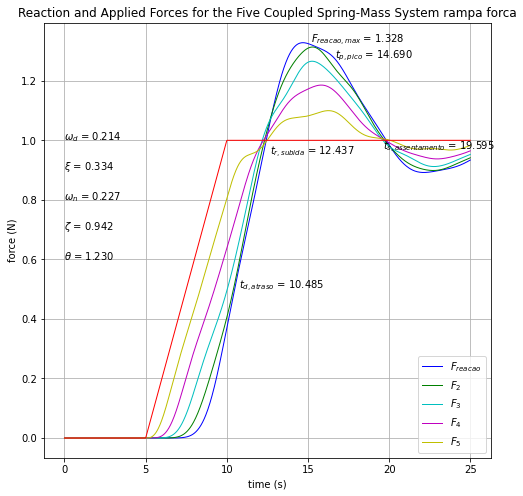

In [ ]:
plt.figure(figsize=(8,8))
Freacao = -k1*np.array(ax1) + np.array([k1*L1 for i in range(len(ax1))])
plt.plot(at, Freacao, 'b', linewidth=1)
F2 = -k2*(np.array(ax2)-np.array(ax1)-L2)
plt.plot(at, F2, 'g', linewidth=1)
F3 = -k3*(np.array(ax3)-np.array(ax2)-L3)
plt.plot(at, F3, 'c', linewidth=1)
F4 = -k4*(np.array(ax4)-np.array(ax3)-L4)
plt.plot(at, F4, 'm', linewidth=1)
F5 = -k4*(np.array(ax5)-np.array(ax4)-L4)
plt.plot(at, F5, 'y', linewidth=1)
plt.plot(at, -np.array([ rampa_forca(t) for t in at ]), 'r', linewidth=1)

plt.text(
    at[np.where(Freacao == max(Freacao))[0][0]]+0.5,
    max(Freacao),
    '$F_{reacao,max}$ = '+str("{:.3f}".format(max(Freacao)))
    )
array_diferencas = Freacao - (-forca_final)
indice_tr = np.abs(array_diferencas)[:np.where(Freacao == max(Freacao))[0][0]].argmin()
plt.text(
    at[indice_tr]+0.25,
    -forca_final-0.05,
    '$t_{r,subida}$ = '+str("{:.3f}".format(at[indice_tr]))
    )
array_diferencas = Freacao - (-forca_final/2)
indice_td = np.abs(array_diferencas)[:np.where(Freacao == max(Freacao))[0][0]].argmin()
plt.text(
    at[indice_td]+0.25,
    - forca_final/2,
    '$t_{d,atraso}$ = '+str("{:.3f}".format(at[indice_td]))
    )
indice_tp = np.where(Freacao == max(Freacao))[0][0]
plt.text(
    at[indice_tp]+2,
    Freacao[indice_tp]-0.05,
    '$t_{p,pico}$ = '+str("{:.3f}".format(at[indice_tp]))
    )
tolerancia = 0.02
array_diferencas_abs = np.abs( Freacao - (-forca_final) )
indices_tol = np.where(array_diferencas_abs < tolerancia)[0]
comecos_de_pedacos = []
for i in range(len(indices_tol)-1):
  if indices_tol[i] != indices_tol[i+1]-1:
    comecos_de_pedacos.append(i)
indice_ts = indices_tol[comecos_de_pedacos[-1]+1]
plt.text(
    at[indice_ts],
    Freacao[indice_ts]-0.05,
    '$t_{s,assentamento}$ = '+str("{:.3f}".format(at[indice_ts]))
    )
omega_d = np.pi/at[indice_tp]
plt.text(
    0.0, 1.0,
    '$\omega_d$ = '+str("{:.3f}".format(omega_d))
)
UP = max(Freacao) - (-forca_final)
xi = -np.log(UP)/np.sqrt(np.pi**2+np.log(UP)**2)
plt.text(
    0.0, 0.9,
    r'$\xi$ = '+str("{:.3f}".format(xi))
)
omega_n = omega_d/np.sqrt(1-xi*xi)
plt.text(
    0.0, 0.8,
    '$\omega_n$ = '+str("{:.3f}".format(omega_n))
)
zeta = np.sqrt(1-xi**2)
plt.text(
    0.0, 0.7,
    '$\zeta$ = '+str("{:.3f}".format(zeta))
)
theta = np.arctan(np.sqrt(1-xi**2)/xi)
plt.text(
    0.0, 0.6,
    r'$\theta$ = '+str("{:.3f}".format(theta))
)
plt.grid(visible=True)
plt.xlabel('time (s)')
plt.ylabel('force (N)')
plt.legend((r'$F_{reacao}$', r'$F_{2}$', r'$F_{3}$', r'$F_{4}$', r'$F_{5}$'),loc='lower right')
plt.title('Reaction and Applied Forces for the Five Coupled Spring-Mass System rampa forca')

#### Posições

Text(0.5, 1.0, 'Mass Displacements for the Five Coupled Spring-Mass System rampa forca')

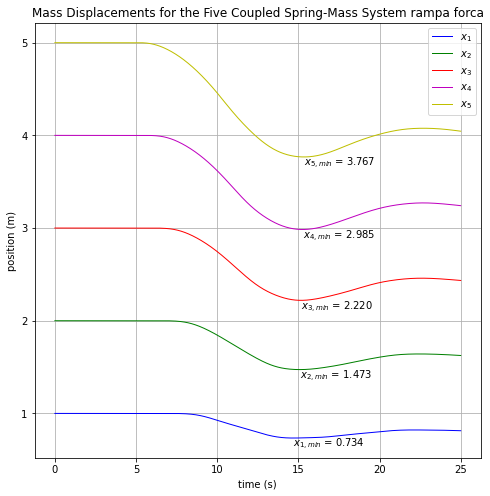

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(at, ax1, 'b', linewidth=1)
plt.plot(at, ax2, 'g', linewidth=1)
plt.plot(at, ax3, 'r', linewidth=1)
plt.plot(at, ax4, 'm', linewidth=1)
plt.plot(at, ax5, 'y', linewidth=1)

plt.text(at[ax1.index(min(ax1))], min(ax1)-0.1, '$x_{1,min}$ = '+str("{:.3f}".format(min(ax1))))
plt.text(at[ax2.index(min(ax2))], min(ax2)-0.1, '$x_{2,min}$ = '+str("{:.3f}".format(min(ax2))))
plt.text(at[ax3.index(min(ax3))], min(ax3)-0.1, '$x_{3,min}$ = '+str("{:.3f}".format(min(ax3))))
plt.text(at[ax4.index(min(ax4))], min(ax4)-0.1, '$x_{4,min}$ = '+str("{:.3f}".format(min(ax4))))
plt.text(at[ax5.index(min(ax5))], min(ax5)-0.1, '$x_{5,min}$ = '+str("{:.3f}".format(min(ax5))))
plt.grid(visible=True)
plt.xlabel('time (s)')
plt.ylabel('position (m)')
plt.legend((r'$x_1$', r'$x_2$', r'$x_3$', r'$x_4$', r'$x_5$'))
plt.title('Mass Displacements for the Five Coupled Spring-Mass System rampa forca')

#### Velocidades

Text(0.5, 1.0, 'Mass Velocities for the Five Coupled Spring-Mass System rampa forca')

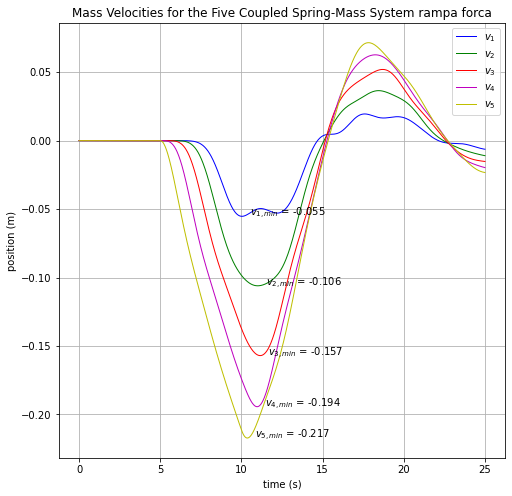

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(at, ay1, 'b', linewidth=1)
plt.plot(at, ay2, 'g', linewidth=1)
plt.plot(at, ay3, 'r', linewidth=1)
plt.plot(at, ay4, 'm', linewidth=1)
plt.plot(at, ay5, 'y', linewidth=1)


plt.text(at[ay1.index(min(ay1))]+0.5, min(ay1), '$v_{1,min}$ = '+str("{:.3f}".format(min(ay1))))
plt.text(at[ay2.index(min(ay2))]+0.5, min(ay2), '$v_{2,min}$ = '+str("{:.3f}".format(min(ay2))))
plt.text(at[ay3.index(min(ay3))]+0.5, min(ay3), '$v_{3,min}$ = '+str("{:.3f}".format(min(ay3))))
plt.text(at[ay4.index(min(ay4))]+0.5, min(ay4), '$v_{4,min}$ = '+str("{:.3f}".format(min(ay4))))
plt.text(at[ay5.index(min(ay5))]+0.5, min(ay5), '$v_{5,min}$ = '+str("{:.3f}".format(min(ay5))))

plt.grid(visible=True)
plt.xlabel('time (s)')
plt.ylabel('position (m)')
plt.legend((r'$v_1$', r'$v_2$', r'$v_3$', r'$v_4$', r'$v_5$'))
plt.title('Mass Velocities for the Five Coupled Spring-Mass System rampa forca')

Text(0.5, 1.0, 'Energies')

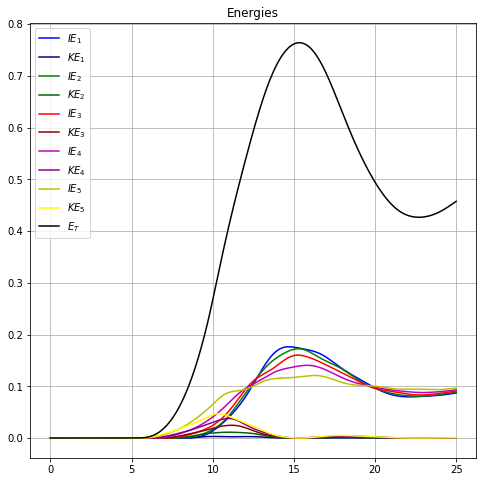

In [ ]:

# adendo
plt.figure(figsize=(8,8))
plt.grid(visible=True)
plt.plot(at,IE1,'b-')
plt.plot(at,KE1,'darkblue')
plt.plot(at,IE2,'g-')
plt.plot(at,KE2,'darkgreen')
plt.plot(at,IE3,'r-')
plt.plot(at,KE3,'darkred')
plt.plot(at,IE4,'m-')
plt.plot(at,KE4,'darkmagenta')
plt.plot(at,IE5,'y-')
plt.plot(at,KE5,'yellow')
plt.plot(at,ET,'black')
plt.legend((r'$IE_1$',r'$KE_1$',r'$IE_2$',r'$KE_2$',r'$IE_3$',r'$KE_3$',r'$IE_4$',r'$KE_4$',r'$IE_5$',r'$KE_5$',r'$E_T$'))
plt.title('Energies')

#### Extremos

In [ ]:
print('x1_min = '+str(min(ax1)))
print('x2_min = '+str(min(ax2)))
print('x3_min = '+str(min(ax3)))

print('Freacao_max = '+str(max(-k1*np.array(ax1) + np.array([k1*L1 for i in range(len(ax1))]))))
print('Fx2_min = '+str(min(np.array([ rampa_forca(t) for t in at ]))))

x1_min = 0.7344147612717546
x2_min = 1.4730224540775927
x3_min = 2.220044588726835
Freacao_max = 1.3279261936412268
Fx2_min = -1.0


In [ ]:
print(np.array([
    # nolds.lyap_r(a)#x1),
    nolds.lyap_e(ax1),#,emb_dim=28,matrix_dim=10),
    # nolds.dfa(ax1))#,
    # nolds.lyap_r(a)#x2),
    nolds.lyap_e(ax2),#,emb_dim=28,matrix_dim=10),
    # nolds.dfa(ax2))#,
    nolds.lyap_e(ax3),#,emb_dim=28,matrix_dim=10),
    
    nolds.lyap_e(ax4),#,emb_dim=28,matrix_dim=10),
    
    nolds.lyap_e(ax5),#,emb_dim=28,matrix_dim=10),
]))

[[ 0.03214488  0.01361234  0.00343519 -0.21674193]
 [ 0.03626666  0.01498633 -0.00592463 -0.18301497]
 [ 0.03594317  0.01141037 -0.01202924 -0.19860859]
 [ 0.02610342  0.01035235 -0.02977679 -0.20020126]
 [ 0.03016405 -0.00448241 -0.03490504 -0.21381627]]


## Entrada de Rampa em Deslocamento em $x_3$

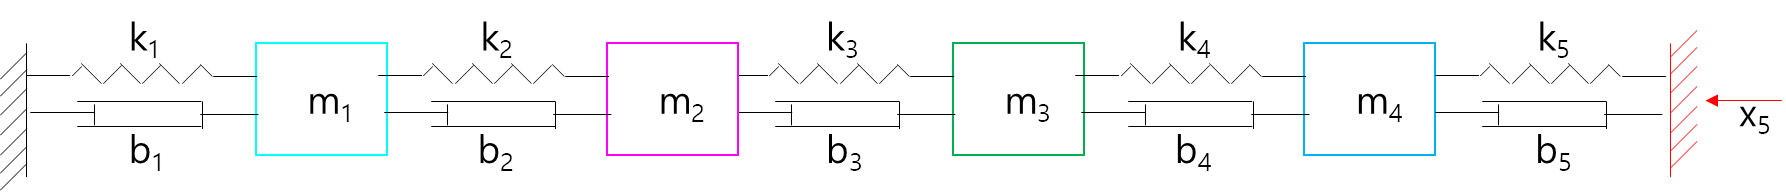

### Entradas

#### Rampa em Degrau de Entrada

In [ ]:
# rampa de deslocamento
# def rampa_disp(t):
#     if t < 5.0:
#         desl = L1 + L2 + L3
#     elif t >=5.0 and t <= 10.0:
#         desl = 3.0 - 0.2*t
#     else:
#         desl = (L1+L2+L3)
#     return desl

In [ ]:
def rampa_disp(t):
    return rampa_forca(t)*(1/k1+1/k2+1/k3+1/k4+1/k5)+(L1+L2+L3+L4+L5)

Criando uma derivada da função rampa definida de forma simbólica.

In [ ]:
from sympy import Piecewise
from sympy import symbols

In [ ]:
tempo = symbols('t')
rampa_desl = Piecewise(
    (forca_inicial, (tempo > 0.0) & (tempo < 5.0)),
    (forca_inicial+(forca_final-forca_inicial)/(10.0-5.0)*(tempo-5.0), (tempo >= 5.0) & (tempo < 10.0)),
    (forca_final*(1/k1+1/k2+1/k3+1/k4+1/k5)+(L1+L2+L3+L4+L5), (tempo >= 10.0))
)
rampa_desl_derivada = rampa_desl.diff(tempo)
rampa_desl.diff(tempo)

Piecewise((0, (t > 0.0) & (t < 5.0)), (-0.2, (t >= 5.0) & (t < 10.0)), (0, t >= 10.0))

In [ ]:
def rampa_desl_vectorfield(w, t, p):
    """
    Defines the differential equations for the coupled spring-mass system.

    Arguments:
        w :  vector of the state variables:
                  w = [x1,y1,x2,y2]
        t :  time
        p :  vector of the parameters:
                  p = [m1,m2,k1,k2,L1,L2,b1,b2]
    """
    x1, y1, x2, y2, x3, y3, x4, y4 = w
    m1, m2, m3, m4, k1, k2, k3, k4, k5, L1, L2, L3, L4, L5, b1, b2, b3, b4, b5 = p

    # Create f = (x1',y1',x2',y2'):
    f = [
            y1,
            (-b1 * y1 - k1 * (x1 - L1) + k2 * (x2 - x1 - L2) ) / m1,
            y2,
            (-b2 * y2 - k2 * (x2 - x1 - L2) + k3 * (x3 -x2 - L3) ) / m2,
            y3,
            (-b3 * y3 - k3 * (x3 - x2 - L3) + k4 * (x4 - x3 - L4) ) / m3,
            y4,
            (-b4 * y4 - k4 * (x4 - x3 - L4) + k5 * (rampa_disp(t) - x4 - L5) ) / m4,
        ]
    return f

### Saídas

#### Unpacking

In [ ]:
# Pack up the parameters and initial conditions:
p = [m1, m2, m3, m4, k1, k2, k3, k4, k5, L1, L2, L3, L4, L5, b1, b2, b3, b4, b5]
w0 = [x1, y1, x2, y2, x3, y3, x4, y4]

# Call the ODE solver.
wsol = odeint(rampa_desl_vectorfield, w0, t, args=(p,),
              atol=abserr, rtol=relerr)

at, ax1, ay1, ax2, ay2, ax3, ay3, ax4, ay4, ax5, ay5 = [],[],[],[],[],[],[],[],[],[],[]

# adendo
IE1, KE1 = [],[]
IE2, KE2 = [],[]
IE3, KE3 = [],[]
IE4, KE4 = [],[]
IE5, KE5 = [],[]
ET = []
for t1, w1 in zip(t, wsol):
    # print( t1, w1[0], w1[1], w1[2], w1[3])
    at.append(t1)
    ax1.append(w1[0])
    ay1.append(w1[1])
    ax2.append(w1[2])
    ay2.append(w1[3])
    ax3.append(w1[4])
    ay3.append(w1[5])
    ax4.append(w1[6])
    ay4.append(w1[7])
    ax5.append(rampa_disp(t1))
    ay5.append(rampa_desl_derivada.subs({tempo:t1}))

    IE1.append(k1*(w1[0]-L1)**2/2)
    KE1.append(m1*w1[1]**2/2)
    IE2.append(k2*(w1[2]-w1[0]-L2)**2/2)
    KE2.append(m2*w1[3]**2/2)
    IE3.append(k3*(w1[4]-w1[2]-L3)**2/2)
    KE3.append(m3*w1[5]**2/2)
    IE4.append(k4*(w1[6]-w1[4]-L4)**2/2)
    KE4.append(m4*w1[7]**2/2)
    IE5.append(k5*(rampa_disp(t1)-w1[6]-L5)**2/2)
    KE5.append(m5*rampa_desl_derivada.subs({tempo:t1})**2/2)
    ET.append(k1*(w1[0]-L1)**2/2+
              m1*w1[1]**2/2+
              k2*(w1[2]-w1[0]-L2)**2/2+
              m2*w1[3]**2/2+
              k3*(w1[4]-w1[2]-L3)**2/2+
              m3*w1[5]**2/2+
              k4*(w1[6]-w1[4]-L3)**2/2+
              m4*w1[7]**2/2+
              k5*(rampa_disp(t1)-w1[6]-L3)**2/2+
              m5*rampa_desl_derivada.subs({tempo:t1})**2/2)

#### Forças de Reação

Text(0.5, 1.0, 'Reaction and Applied Forces for the Five Coupled Spring-Mass System rampa desl')

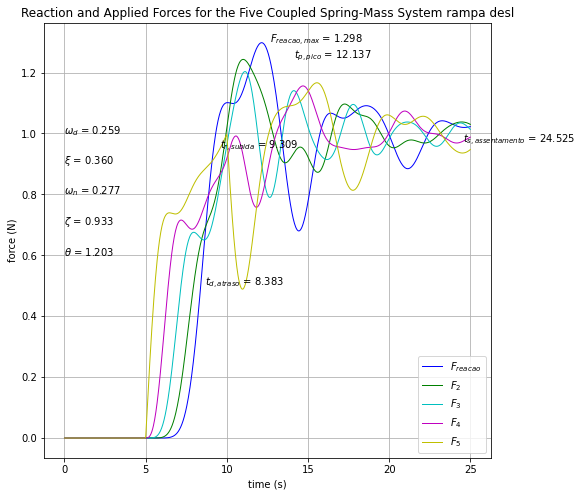

In [ ]:
plt.figure(figsize=(8,8))
Freacao = -k1*np.array(ax1) + np.array([k1*L1 for i in range(len(ax1))])
plt.plot(at, Freacao, 'b', linewidth=1)
F2 = -k2*(np.array(ax2)-np.array(ax1)-L2)
plt.plot(at, F2, 'g', linewidth=1)
F3 = -k3*(np.array(ax3)-np.array(ax2)-L3)
plt.plot(at, F3, 'c', linewidth=1)
F4 = -k4*(np.array(ax4)-np.array(ax3)-L4)
plt.plot(at, F4, 'm', linewidth=1)
F5 = -k4*(np.array(ax5)-np.array(ax4)-L4)
plt.plot(at, F5, 'y', linewidth=1)

plt.text(
    at[np.where(Freacao == max(Freacao))[0][0]]+0.5,
    max(Freacao),
    '$F_{reacao,max}$ = '+str("{:.3f}".format(max(Freacao)))
    )
array_diferencas = Freacao - (-forca_final)
indice_tr = np.abs(array_diferencas)[:np.where(Freacao == max(Freacao))[0][0]].argmin()
plt.text(
    at[indice_tr]+0.25,
    -forca_final-0.05,
    '$t_{r,subida}$ = '+str("{:.3f}".format(at[indice_tr]))
    )
array_diferencas = Freacao - (-forca_final/2)
indice_td = np.abs(array_diferencas)[:np.where(Freacao == max(Freacao))[0][0]].argmin()
plt.text(
    at[indice_td]+0.25,
    - forca_final/2,
    '$t_{d,atraso}$ = '+str("{:.3f}".format(at[indice_td]))
    )
indice_tp = np.where(Freacao == max(Freacao))[0][0]
plt.text(
    at[indice_tp]+2,
    Freacao[indice_tp]-0.05,
    '$t_{p,pico}$ = '+str("{:.3f}".format(at[indice_tp]))
    )
tolerancia = 0.02
array_diferencas_abs = np.abs( Freacao - (-forca_final) )
indices_tol = np.where(array_diferencas_abs < tolerancia)[0]
comecos_de_pedacos = []
for i in range(len(indices_tol)-1):
  if indices_tol[i] != indices_tol[i+1]-1:
    comecos_de_pedacos.append(i)
indice_ts = indices_tol[comecos_de_pedacos[-1]+1]
plt.text(
    at[indice_ts],
    Freacao[indice_ts]-0.05,
    '$t_{s,assentamento}$ = '+str("{:.3f}".format(at[indice_ts]))
    )
omega_d = np.pi/at[indice_tp]
plt.text(
    0.0, 1.0,
    '$\omega_d$ = '+str("{:.3f}".format(omega_d))
)
UP = max(Freacao) - (-forca_final)
xi = -np.log(UP)/np.sqrt(np.pi**2+np.log(UP)**2)
plt.text(
    0.0, 0.9,
    r'$\xi$ = '+str("{:.3f}".format(xi))
)
omega_n = omega_d/np.sqrt(1-xi*xi)
plt.text(
    0.0, 0.8,
    '$\omega_n$ = '+str("{:.3f}".format(omega_n))
)
zeta = np.sqrt(1-xi**2)
plt.text(
    0.0, 0.7,
    '$\zeta$ = '+str("{:.3f}".format(zeta))
)
theta = np.arctan(np.sqrt(1-xi**2)/xi)
plt.text(
    0.0, 0.6,
    r'$\theta$ = '+str("{:.3f}".format(theta))
)
plt.grid(visible=True)
plt.xlabel('time (s)')
plt.ylabel('force (N)')
plt.legend((r'$F_{reacao}$', r'$F_{2}$', r'$F_{3}$', r'$F_{4}$', r'$F_{5}$'),loc='lower right')
plt.title('Reaction and Applied Forces for the Five Coupled Spring-Mass System rampa desl')

#### Posições

Text(0.5, 1.0, 'Mass Displacements for the Five Coupled Spring-Mass System rampa desl')

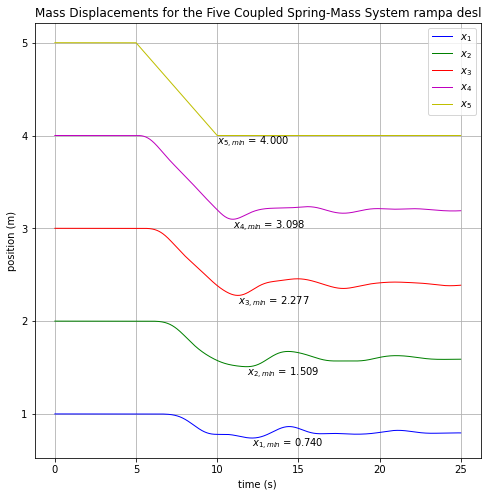

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(at, ax1, 'b', linewidth=1)
plt.plot(at, ax2, 'g', linewidth=1)
plt.plot(at, ax3, 'r', linewidth=1)
plt.plot(at, ax4, 'm', linewidth=1)
plt.plot(at, ax5, 'y', linewidth=1)

plt.text(at[ax1.index(min(ax1))], min(ax1)-0.1, '$x_{1,min}$ = '+str("{:.3f}".format(min(ax1))))
plt.text(at[ax2.index(min(ax2))], min(ax2)-0.1, '$x_{2,min}$ = '+str("{:.3f}".format(min(ax2))))
plt.text(at[ax3.index(min(ax3))], min(ax3)-0.1, '$x_{3,min}$ = '+str("{:.3f}".format(min(ax3))))
plt.text(at[ax4.index(min(ax4))], min(ax4)-0.1, '$x_{4,min}$ = '+str("{:.3f}".format(min(ax4))))
plt.text(at[ax5.index(min(ax5))], min(ax5)-0.1, '$x_{5,min}$ = '+str("{:.3f}".format(min(ax5))))
plt.grid(visible=True)
plt.xlabel('time (s)')
plt.ylabel('position (m)')
plt.legend((r'$x_1$', r'$x_2$', r'$x_3$', r'$x_4$', r'$x_5$'))
plt.title('Mass Displacements for the Five Coupled Spring-Mass System rampa desl')

#### Velocidades

Text(0.5, 1.0, 'Mass Velocities for the Five Coupled Spring-Mass System rampa desl')

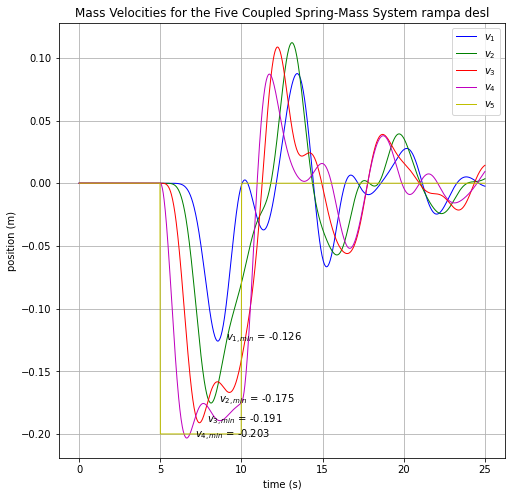

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(at, ay1, 'b', linewidth=1)
plt.plot(at, ay2, 'g', linewidth=1)
plt.plot(at, ay3, 'r', linewidth=1)
plt.plot(at, ay4, 'm', linewidth=1)
plt.plot(at, ay5, 'y', linewidth=1)


plt.text(at[ay1.index(min(ay1))]+0.5, min(ay1), '$v_{1,min}$ = '+str("{:.3f}".format(min(ay1))))
plt.text(at[ay2.index(min(ay2))]+0.5, min(ay2), '$v_{2,min}$ = '+str("{:.3f}".format(min(ay2))))
plt.text(at[ay3.index(min(ay3))]+0.5, min(ay3), '$v_{3,min}$ = '+str("{:.3f}".format(min(ay3))))
plt.text(at[ay4.index(min(ay4))]+0.5, min(ay4), '$v_{4,min}$ = '+str("{:.3f}".format(min(ay4))))
# plt.text(at[ay5.index(min(ay5))]+0.5, min(ay5), '$v_{5,min}$ = '+str("{:.3f}".format(min(ay5))))

plt.grid(visible=True)
plt.xlabel('time (s)')
plt.ylabel('position (m)')
plt.legend((r'$v_1$', r'$v_2$', r'$v_3$', r'$v_4$', r'$v_5$'))
plt.title('Mass Velocities for the Five Coupled Spring-Mass System rampa desl')

Text(0.5, 1.0, 'Energies')

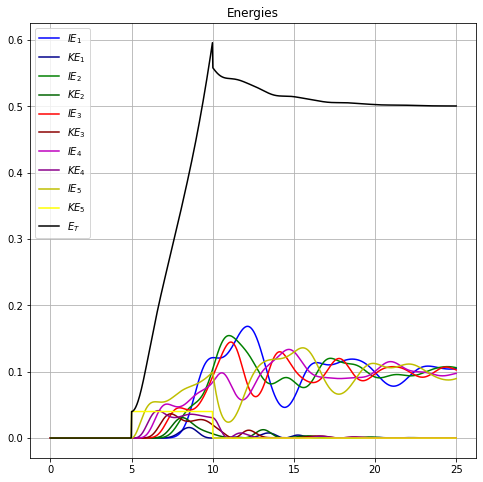

In [ ]:

# adendo
plt.figure(figsize=(8,8))
plt.grid(visible=True)
plt.plot(at,IE1,'b-')
plt.plot(at,KE1,'darkblue')
plt.plot(at,IE2,'g-')
plt.plot(at,KE2,'darkgreen')
plt.plot(at,IE3,'r-')
plt.plot(at,KE3,'darkred')
plt.plot(at,IE4,'m-')
plt.plot(at,KE4,'darkmagenta')
plt.plot(at,IE5,'y-')
plt.plot(at,KE5,'yellow')
plt.plot(at,ET,'black')
plt.legend((r'$IE_1$',r'$KE_1$',r'$IE_2$',r'$KE_2$',r'$IE_3$',r'$KE_3$',r'$IE_4$',r'$KE_4$',r'$IE_5$',r'$KE_5$',r'$E_T$'))
plt.title('Energies')

#### Extremos

In [ ]:
print('x1_min = '+str(min(ax1)))
print('x2_min = '+str(min(ax2)))
print('x3_min = '+str(min(ax3)))

print('Freacao_max = '+str(max(-k1*np.array(ax1) + np.array([k1*L1 for i in range(len(ax1))]))))
print('Fx2_min = '+str(min(np.array([ rampa_forca(t) for t in at ]))))

x1_min = 0.7404160573369969
x2_min = 1.509165979171016
x3_min = 2.2772259950750127
Freacao_max = 1.2979197133150153
Fx2_min = -1.0


In [ ]:
print(np.array([
    # nolds.lyap_r(a)#x1),
    nolds.lyap_e(ax1),#,emb_dim=28,matrix_dim=10),
    # nolds.dfa(ax1))#,
    # nolds.lyap_r(a)#x2),
    nolds.lyap_e(ax2),#,emb_dim=28,matrix_dim=10),
    # nolds.dfa(ax2))#,
    nolds.lyap_e(ax3),#,emb_dim=28,matrix_dim=10),
    
    nolds.lyap_e(ax4),#,emb_dim=28,matrix_dim=10),
    
    nolds.lyap_e(ax5),#,emb_dim=28,matrix_dim=10),
]))

[[ 3.1482887e-02  8.3702663e-03 -1.1818521e-02 -1.8653308e-01]
 [ 2.4311991e-02  1.0679369e-02  6.2855618e-04 -1.7828493e-01]
 [ 2.3236677e-02  1.4880785e-02 -9.1063632e-03 -2.5314012e-01]
 [ 1.5133782e-02 -1.0914505e-02 -2.9525759e-02 -1.7630185e-01]
 [-6.4179853e-02 -2.6111689e-01 -3.6814681e-01 -6.8657070e-01]]


Can I calculate the Kaplan-Yorke dimension?

In [ ]:
#nolds.lyap_e(ax1,emb_dim=19*4+1,matrix_dim=20)

In [ ]:
19*4+1

77